# Stocks Portfolio Optimization

In this project, I will build two $50,000 investment portfolios containing four stocks (AAPL, AMD, MSFT, ORCL). The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. 


### To build these portfolios, I will:

1. Import two years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 50,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Data Wrangling

In [4]:
# loading the dataset

# list of the cvs names
stock = ['AAPL', 'AMD', 'MSFT', 'ORCL']

# empty dictionary
file = {}

# for loop
for item in stock:
    file[item] = pd.read_csv(f"{item}.csv", index_col="Date", parse_dates= True)


In [5]:
# examine the dataset

file["AMD"].head(3)

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000


In [29]:
# function to get column data for a stock ticker and convert to dataframe

def get_columns(column_name):
    
    positional_value = {}

    for stock_name, stock_price in file.items():
        positional_value[stock_name] = stock_price[column_name]

    # Dataframe

    positional_value = pd.DataFrame(positional_value)
    positional_value["Total"] = positional_value.sum(axis=1)
    
    #drop dataframe
   

    return positional_value
    

### Equal weighted portfolio Calculation

In [39]:
for stock_name, stock_price in file.items():
    initial_close = stock_price.iloc[0]["Adj Close"]
    stock_price["Normalized Return"] = stock_price["Adj Close"] / initial_close
    
    # Equal weighted allocation for each stocks (1/4 = 0.25)
    stock_price["Allocation"] = stock_price["Normalized Return"] * 0.25
    
    # portfolio value 
    stock_price["Position Value"] = stock_price["Allocation"] * 50000
    
    
    stock_price["Daily Return"] = (stock_price["Adj Close"].pct_change() * 100)
    
    


# examing the calculation
file["MSFT"].head()
   

,Adj Close,Normalized Return,Allocation,Position Value,Daily Return
Date,,,,,
2019-01-02,96.632668,1.000000,0.250000,12500.000000,NaN
2019-01-03,93.077728,0.963212,0.240803,12040.147840,-3.678817
2019-01-04,97.406723,1.008010,0.252003,12600.128598,4.650946
2019-01-07,97.530945,1.009296,0.252324,12616.197414,0.127529
2019-01-08,98.238113,1.016614,0.254153,12707.673800,0.725071


In [40]:
# positional_value data

stock_cprice = get_columns("Adj Close")
stock_cprice.head()

,AAPL,AMD,MSFT,ORCL,Total
Date,,,,,
2019-01-02,38.047047,18.830000,96.632668,42.138145,195.647860
2019-01-03,34.257271,17.049999,93.077728,41.728134,186.113132
2019-01-04,35.719696,19.000000,97.406723,43.526596,195.653015
2019-01-07,35.640198,20.570000,97.530945,44.216164,197.957306
2019-01-08,36.319611,20.750000,98.238113,44.616867,199.924591


In [41]:
# positional_value data
stock_return = get_columns("Daily Return")
stock_return.dropna()

,AAPL,AMD,MSFT,ORCL,Total
Date,,,,,
2019-01-03,-9.960762,-9.453004,-3.678817,-0.973017,-24.065601
2019-01-04,4.268948,11.436955,4.650946,4.309950,24.666800
2019-01-07,-0.222561,8.263156,0.127529,1.584244,9.752368
2019-01-08,1.906311,0.875062,0.725071,0.906237,4.412681
2019-01-09,1.698157,-2.698793,1.429933,-0.208857,0.220441
...,...,...,...,...,...
2021-12-23,0.364369,1.570750,0.447186,-0.155809,2.226496
2021-12-27,2.297491,5.624744,2.318566,-0.200616,10.040185
2021-12-28,-0.576730,-0.783886,-0.350432,-0.993976,-2.705025


In [42]:
# positional_value data

positional_value = get_columns("Position Value")
positional_value.head()

,AAPL,AMD,MSFT,ORCL,Total
Date,,,,,
2019-01-02,12500.000000,12500.000000,12500.000000,12500.000000,50000.000000
2019-01-03,11254.904723,11318.374473,12040.147840,12378.372883,46991.799919
2019-01-04,11735.370804,12612.851883,12600.128598,12911.874623,49860.225908
2019-01-07,11709.252387,13655.071547,12616.197414,13116.430246,51096.951593
2019-01-08,11932.467098,13774.561925,12707.673800,13235.296248,51649.999070


In [43]:
# Descreptive Statistics

stock_cprice.describe()

,AAPL,AMD,MSFT,ORCL,Total
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,94.552869,65.465344,195.002231,60.988923,416.009368
std,39.569622,33.612617,65.307071,14.861744,150.402375
min,34.257271,17.049999,93.077728,37.887897,186.113132
25%,54.583859,32.814999,134.318733,50.768264,272.284826
50%,89.881695,56.285000,196.587158,53.607904,395.610512
75%,128.835281,86.709999,239.390968,70.690884,521.621052
max,179.016113,161.910004,339.075562,101.501640,759.483559


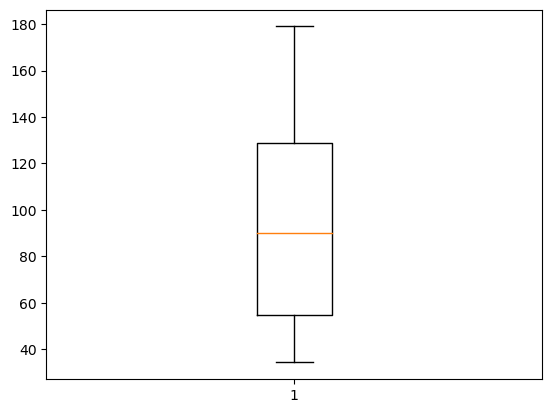

In [44]:
plt.boxplot(stock_cprice["AAPL"]);

### Visualize the Portfolio Performance

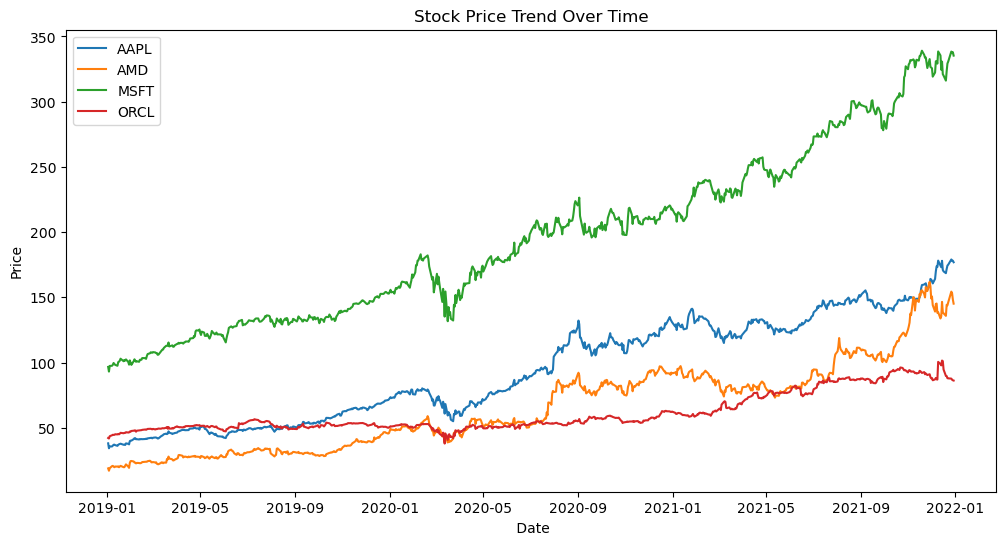

In [45]:
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(stock_cprice["AAPL"], label="AAPL")
plt.plot(stock_cprice["AMD"], label="AMD")
plt.plot(stock_cprice["MSFT"], label="MSFT")
plt.plot(stock_cprice["ORCL"], label="ORCL")


plt.xlabel(" Date")
plt.ylabel("Price")
plt.title("Stock Price Trend Over Time")
plt.legend();

We can see that the four stocks performed well over time, despite the bad market conditions; they are currently performing well. From the plot, we can see that MSFT performed better than the other stocks. However, we cannot conclude with just the price. We should check the returns of the stocks to know how well they perform.


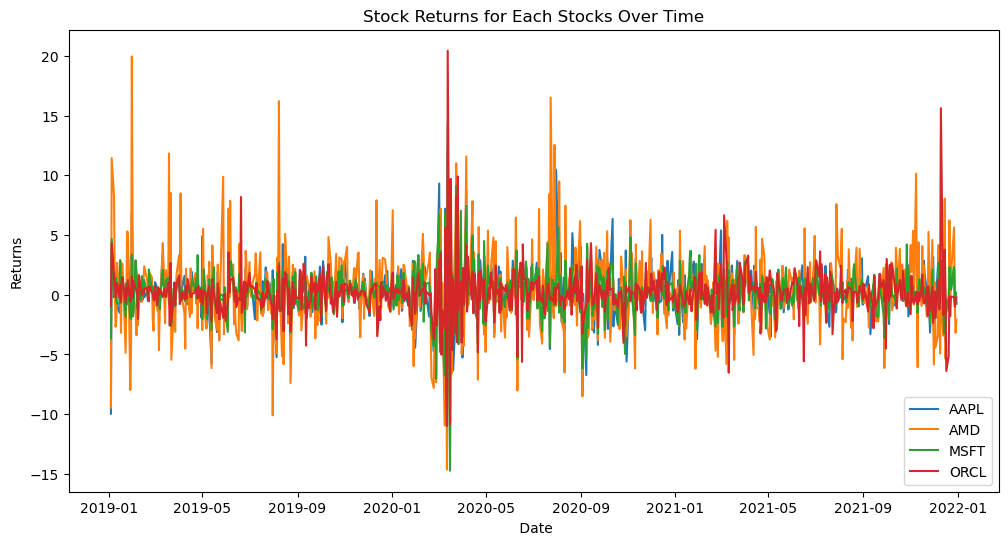

In [46]:
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(stock_return["AAPL"], label="AAPL")
plt.plot(stock_return["AMD"], label="AMD")
plt.plot(stock_return["MSFT"], label="MSFT")
plt.plot(stock_return["ORCL"], label="ORCL")


plt.xlabel(" Date")
plt.ylabel("Returns")
plt.title("Stock Returns for Each Stocks Over Time")
plt.legend();

The chart shows the stock returns for each stock over time. It seems that AMD outperformed the rest of the stocks in returns and AAPL did not performed well as expected from the previous plot.

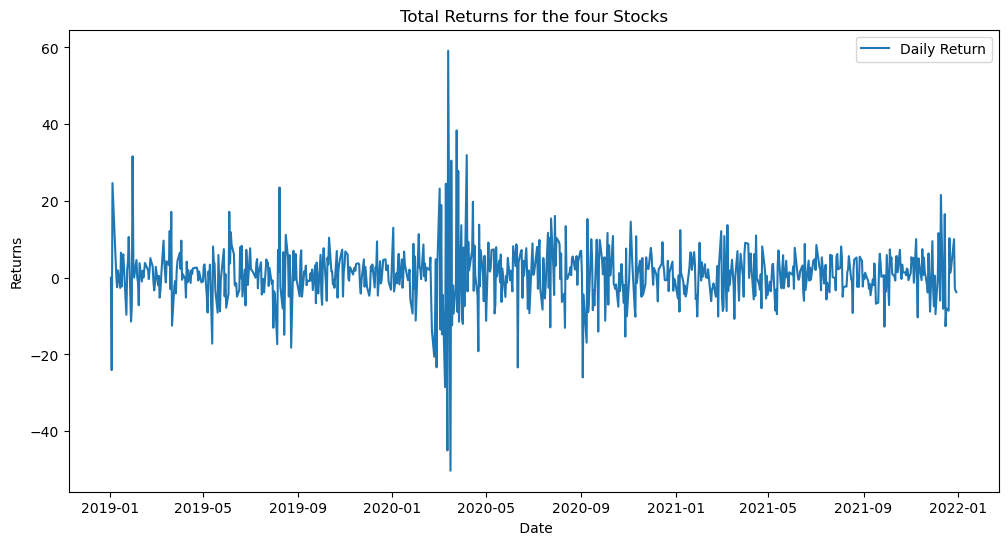

In [47]:
fig, ax = plt.subplots(figsize=(12,6))


plt.plot(stock_return["Total"], label="Daily Return")

plt.xlabel(" Date")
plt.ylabel("Returns")
plt.title("Total Returns for the four Stocks")
plt.legend();

The total daily returns chart periods of high volatility in the sping of 2020, characterized by significant fluctuations in returns. In contrast, the intervening years exhibit lower volatility, indicated by more stable returns.


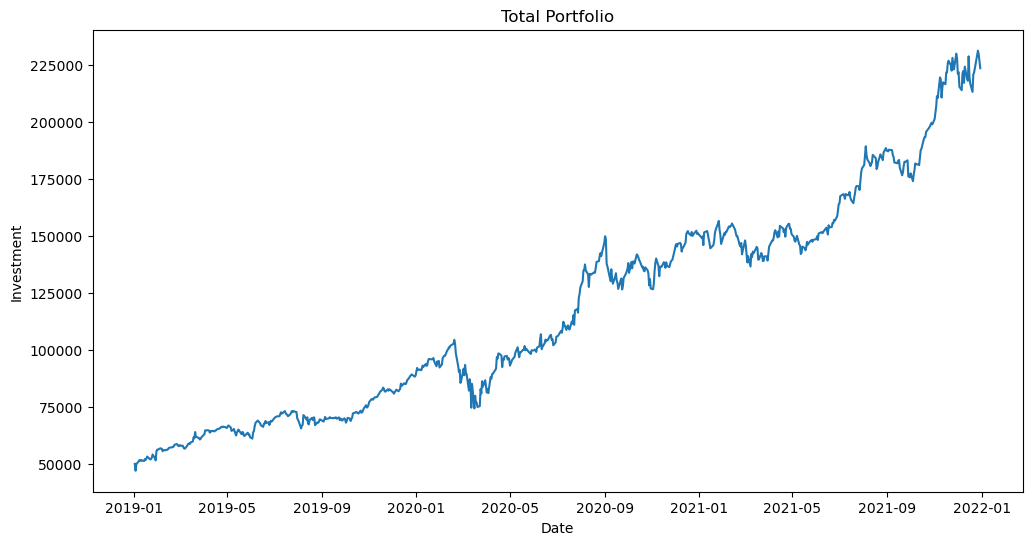

In [48]:
### Total Portfolio
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(positional_value["Total"])

plt.xlabel("Date")
plt.ylabel("Investment")
plt.title("Total Portfolio");


 It seems that investing in the four stocks together looks profitable, as the investment value has been consistently increasing over time. You should also consider the risk-adjusted return, the diversification effect, and the opportunity cost of investing in other assets.

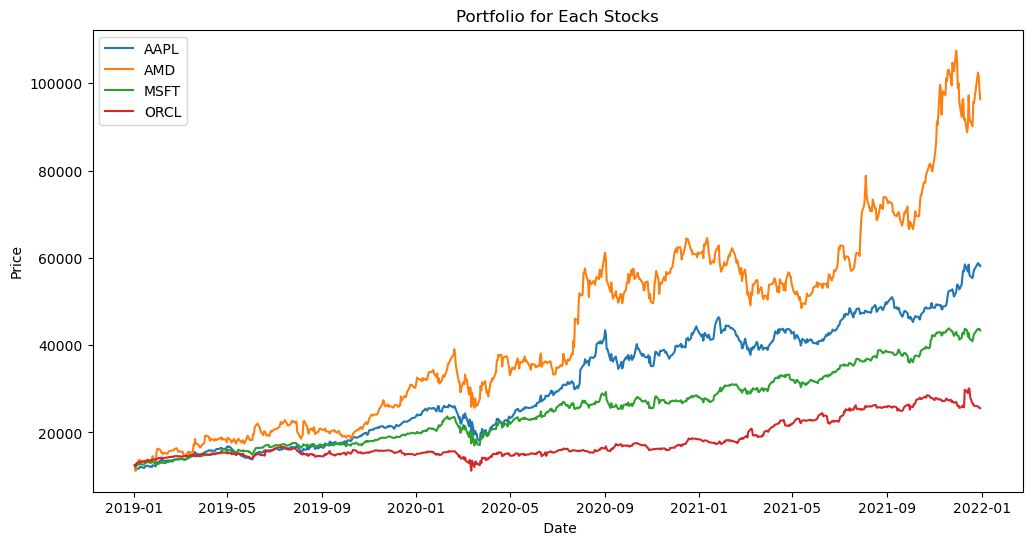

In [50]:
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(positional_value["AAPL"], label="AAPL")
plt.plot(positional_value["AMD"], label="AMD")
plt.plot(positional_value["MSFT"], label="MSFT")
plt.plot(positional_value["ORCL"], label="ORCL")


plt.xlabel(" Date")
plt.ylabel("Price")
plt.title("Portfolio for Each Stocks")
plt.legend();

AMD has shown significant growth over this period, with APPL and MSFT also showing growth but to a lesser extent. ORCL has remained relatively stable in comparison.

From this plot, you can see how the performance of each stock varies over time and how they compare with each other. You can also see the impact of market events and trends on the stock prices. For example, you can see a sharp drop in all stocks around March 2020, which coincides with the onset of the COVID-19 pandemic and its effects on the global economy.

### Calculate Performance Metrics for the Portfolio

In [51]:
# calculating the cumulative return for the three stocks.

start_cummulative_value = positional_value["Total"][0]

end_cummulative_value = positional_value["Total"][-1]

cummulative_return = end_cummulative_value /start_cummulative_value

print(f"Cummulative Portfolio Return: {cummulative_return}")

Cummulative Portfolio Return: 4.4683655744152855


In [53]:
# Daily Return

positional_value["Daily Return"] = (positional_value["Total"].pct_change() * 100)

positional_value = positional_value.dropna()
positional_value.head()

,AAPL,AMD,MSFT,ORCL,Total,Daily Return
Date,,,,,,
2019-01-04,11735.370804,12612.851883,12600.128598,12911.874623,49860.225908,6.104099
2019-01-07,11709.252387,13655.071547,12616.197414,13116.430246,51096.951593,2.480385
2019-01-08,11932.467098,13774.561925,12707.673800,13235.296248,51649.999070,1.082349
2019-01-09,12135.099142,13402.815066,12889.385044,13207.653413,51634.952665,-0.029131
2019-01-10,12173.886997,13104.089120,12806.565804,13218.708057,51303.249978,-0.642400


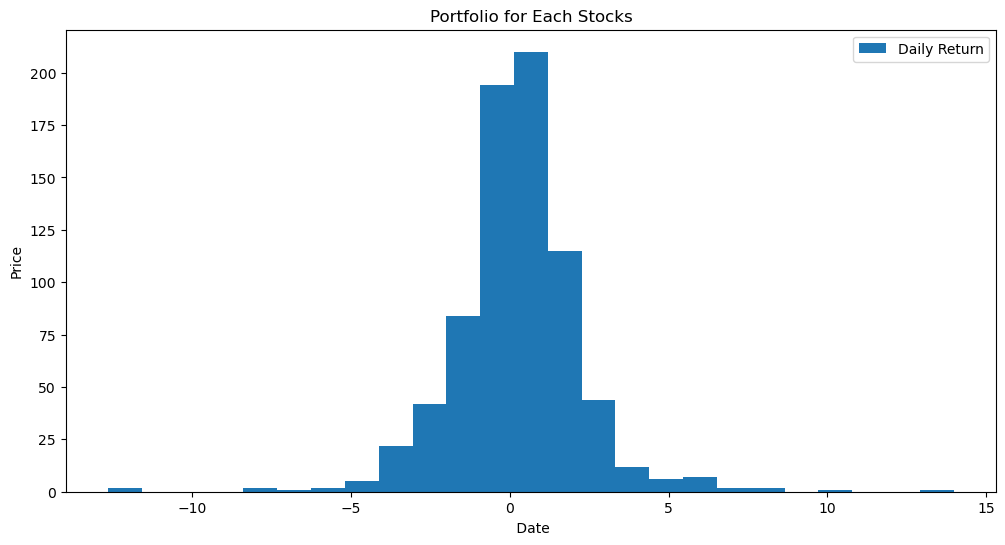

In [80]:
fig, ax = plt.subplots(figsize=(12,6))


plt.hist(positional_value["Daily Return"], label="Daily Return", bins=25)

plt.xlabel(" Date")
plt.ylabel("Price")
plt.title("Portfolio for Each Stocks")
plt.legend();

The bar chart displays the unconditional volatility distribution of total stock daily returns. The distribution is skewed, with a higher frequency of returns near zero and noticeable peaks at approximately 15 and -10. This indicates that the mean of the distribution is centered around zero, but there are some extreme jumps in returns at both ends.


In [55]:
# Calculate the average Daily Return 
avg = positional_value["Daily Return"].mean()

# Calculate the volatility of Daily Return 
vola = positional_value["Daily Return"].std()

print(f"Average Daily Return : {avg}")
print(f"Volatility of Daily Return : {vola}")

Average Daily Return : 0.22810430980117236
Volatility of Daily Return : 2.0566677611071777


### sharp ratio

In [56]:
# Calculate the sharpe ratio

sharp_ratio = avg / vola

annual_sharp_ratio = sharp_ratio * np.sqrt(252)

print(f"Daily sharp ratio : {sharp_ratio}")
print(f"Annual sharp ratio : {annual_sharp_ratio}")

Daily sharp ratio : 0.11090965401158213
Annual sharp ratio : 1.7606361750651816


 since our annualized_sharpe_ratio is greater than one, we can be relatively happy with our portfolio.

In [57]:
# function to get column data for a stock ticker and convert to dataframe

def get_change(column_name):
    
    positional_value = {}

    for stock_name, stock_price in file.items():
        positional_value[stock_name] = stock_price[column_name]

    # Dataframe

    positional_value = pd.DataFrame(positional_value)
    
    # Daily Return


    positional_value = positional_value.dropna()

    return positional_value
    

In [60]:
#  Daily Return_value data

rreturn = get_change("Daily Return")


### Build & Run 10,000 Portfolio Scenarios

In [61]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario

scenarios = 50000

weight_array = np.zeros((scenarios, len(rreturn.columns)))

weight_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [62]:
# Create additional blank arrays for scenario output

returns_array =  np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharp_array = np.zeros(scenarios)

In [63]:
# Import the random package and set the seeds

import random
random.seed(3)
np.random.seed(3)


for index in range(scenarios):
    
    # Generate four random numbers for each index

    numbers =np.array(np.random.random(4))


    # Divide each number by the sum of the numbers to generate the random weight
    weight = numbers / np.sum(numbers)

    # Save the weights in weights_array
    weight_array[index,:] = weight
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(rreturn.mean()*252*weight)
    
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weight.T, np.dot(rreturn.cov()*252, weight)))
    
    # Calculate the Sharpe Ratio for each scenario 
    sharp_array[index] = returns_array[index] / volatility_array[index]


### Identify the Optimal Portfolio

In [64]:
print("The first combination:", weight_array[0] )

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [65]:
# Find the index of the optimal portfolio
index_max = sharp_array.argmax()

index_max

47158

In [66]:
print("The sharpe ratio of the first portfolio:", sharp_array[0])

The sharpe ratio of the first portfolio: 1.7617727785535164


In [73]:
# Print the optimal weights for each stock
print(list(rreturn.columns))
print(weight_array[index_max,:])

['AAPL', 'AMD', 'MSFT', 'ORCL']
[0.56387195 0.29984171 0.13498291 0.00130343]


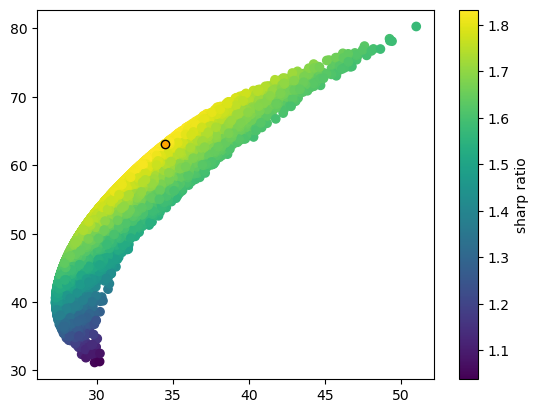

In [75]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharp_return = returns_array[index_max]
max_sharp_volatility = volatility_array[index_max]

# Visualize volatility vs returns for each scenario

plt.scatter(volatility_array, returns_array, c =sharp_array, cmap="viridis")
plt.colorbar(label= "sharp ratio")
# Add the optimal portfolio to the visual
plt.scatter(max_sharp_volatility, max_sharp_return, c = 'orange', edgecolors="black");
